In [1]:
import numpy as np
import networkx as nx
import EoN
import matplotlib.pyplot as plt
import csv, random, pdb, sys
from IPython.core.debugger import set_trace
import copy
import pickle as pkl

In [2]:
sys.path.insert(0, '../lib/')

In [3]:
from util import *
from graph_utils import *

In [4]:
G = nx.generators.random_graphs.powerlaw_cluster_graph(10000, 20, 0.3)
len(G)

10000

In [5]:
if __name__ == '__main__':
### run for a fixed network and fixed alpha
##########################################

    np.random.seed(0)

    T = 10
    epsilon = 0.001
    alphavals = np.arange(0,50,0.5)
    num_times = 10

    n = len(G)
    p = 0.4
    
    raw_data = []
    exp_inf_list = []
    exp_inf_std = []
    n_vacc_size = []
    xlist_alpha = {}
    ts = {}
    for alpha in alphavals:
        zs = []
        vacc_size = []
        xlist = []
        ts[alpha] = []
        
        print("alpha: ", alpha)

        for i in range(num_times):
            x = {}
            Cvacc = {}
            Cinf = {};
            
            for u in G.nodes():
                x[u] = np.random.randint(0, 2)
                Cinf[u] = 1; 
                Cvacc[u] = Cinf[u]*float(alpha)/n
                
            x, nviol, t = best_response_v2(G, Cvacc, Cinf, x, T, p, epsilon)

            if(nviol == 0):
                
                ts[alpha].append(t)
                
                z = exp_infsize(G, x, p)
                zs.append(z)
                
                vaccinated = len([i for i in x if x[i] == 1])
                vacc_size.append(vaccinated)
                xlist.append(x)

        n_vacc_size.append(vacc_size)
        xlist_alpha[alpha] = xlist
        
        zs = np.array(zs)
        exp_inf_list.append(zs.mean())
        exp_inf_std.append(zs.std())
    
    n_vacc_size = np.array(n_vacc_size)


alpha:  0.0
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
alpha:  0.5
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components don

In [19]:
# print(exp_inf_list)
# print(exp_inf_std)
# print(xlist_alpha)

In [12]:
z4 = exp_inf_list
z4std = exp_inf_std

In [14]:
# print(n_vacc_size)

In [24]:
n_num_vacc_list = np.array(n_vacc_size)
vacc_mean = n_num_vacc_list.mean(axis = 1)
vacc_std = n_num_vacc_list.std(axis = 1)
print(list(vacc_mean))
print(list(vacc_std))

[10000.0, 10000.0, 9999.9, 6983.3, 6175.5, 5499.9, 4922.0, 3963.8, 3552.1, 3189.9, 2872.2, 2328.7, 2111.2, 1911.1, 1751.3, 1483.4, 1373.4, 1280.8, 1190.0, 1046.1, 983.9, 926.5, 881.4, 788.6, 746.7, 711.4, 671.5, 620.6, 584.6, 565.0, 540.7, 500.5, 481.6, 466.2, 451.6, 421.1, 405.2, 395.0, 381.1, 357.2, 348.9, 338.7, 327.6, 313.3, 302.3, 296.6, 289.1, 275.0, 265.5, 260.4, 254.3, 245.2, 240.2, 235.4, 230.7, 219.1, 214.2, 214.1, 207.3, 198.3, 193.9, 189.9, 184.9, 176.8, 175.1, 170.6, 165.7, 158.4, 160.1, 154.3, 153.8, 149.4, 145.8, 146.4, 143.6, 137.9, 139.9, 135.1, 134.9, 134.0, 129.8, 130.0, 127.4, 122.3, 120.8, 121.3, 119.4, 116.6, 114.1, 112.5, 112.4, 109.7, 107.6, 108.2, 105.3, 103.8, 102.7, 101.7, 101.1, 100.3]
[0.0, 0.0, 0.3, 13.416780537819049, 11.508692367076288, 17.36346739565574, 16.401219466856727, 14.958609561052125, 11.827510304370909, 19.516403357176237, 11.53082824431966, 9.675226095549396, 15.892136420255145, 15.241062955056647, 13.535508856337836, 11.42978564978364, 15.91

In [25]:
v4 = [10000.0, 10000.0, 9999.9, 6983.3, 6175.5, 5499.9, 4922.0, 3963.8, 3552.1, 3189.9, 2872.2, 2328.7, 2111.2, 1911.1, 1751.3, 1483.4, 1373.4, 1280.8, 1190.0, 1046.1, 983.9, 926.5, 881.4, 788.6, 746.7, 711.4, 671.5, 620.6, 584.6, 565.0, 540.7, 500.5, 481.6, 466.2, 451.6, 421.1, 405.2, 395.0, 381.1, 357.2, 348.9, 338.7, 327.6, 313.3, 302.3, 296.6, 289.1, 275.0, 265.5, 260.4, 254.3, 245.2, 240.2, 235.4, 230.7, 219.1, 214.2, 214.1, 207.3, 198.3, 193.9, 189.9, 184.9, 176.8, 175.1, 170.6, 165.7, 158.4, 160.1, 154.3, 153.8, 149.4, 145.8, 146.4, 143.6, 137.9, 139.9, 135.1, 134.9, 134.0, 129.8, 130.0, 127.4, 122.3, 120.8, 121.3, 119.4, 116.6, 114.1, 112.5, 112.4, 109.7, 107.6, 108.2, 105.3, 103.8, 102.7, 101.7, 101.1, 100.3]
v4std = [0.0, 0.0, 0.3, 13.416780537819049, 11.508692367076288, 17.36346739565574, 16.401219466856727, 14.958609561052125, 11.827510304370909, 19.516403357176237, 11.53082824431966, 9.675226095549396, 15.892136420255145, 15.241062955056647, 13.535508856337836, 11.42978564978364, 15.919798993705918, 11.754148203932091, 11.532562594670797, 14.982990355733397, 10.59669759878048, 8.309632964216892, 16.310732662881826, 7.670723564306042, 11.153923076657827, 6.21610810716802, 9.531526635329726, 8.685620300243384, 5.043808085167396, 5.779273310719955, 9.920181449953423, 5.200961449578338, 5.624944444170093, 7.0398863627192165, 6.343500610861482, 6.518435395092905, 4.308131845707603, 5.458937625582473, 8.055432949258531, 4.728636167014756, 4.482186966202994, 3.195309061734091, 5.219195340279955, 3.689173349139343, 5.762811813689564, 5.748043145279966, 6.0074953183502355, 3.924283374069717, 3.6674241641784495, 4.152107898405339, 5.3113086899558, 3.4292856398964493, 4.019950248448356, 4.8, 3.8223029707232783, 4.182104733265296, 3.4, 4.459820624195551, 2.1931712199461306, 3.348133808556641, 3.562302626111375, 2.118962010041709, 2.8442925306655784, 2.181742422927143, 2.7367864366808017, 2.1999999999999997, 2.9342801502242417, 3.2310988842807027, 3.047950130825634, 2.794637722496424, 2.4, 3.32264954516723, 2.2271057451320084, 1.624807680927192, 2.690724809414742, 1.8681541692269403, 1.6401219466856725, 1.374772708486752, 2.2561028345356955, 3.03315017762062, 2.2715633383201093, 2.0, 2.4979991993593593, 1.4866068747318504, 2.181742422927143, 2.8653097563788803, 4.029888335921977, 2.537715508089904, 2.211334438749598, 2.29128784747792, 3.1368774282716245, 2.9000000000000004, 2.416609194718914, 1.8330302779823358, 1.676305461424021, 2.2715633383201093, 2.0518284528683193, 2.2825424421026654, 1.5132745950421556, 1.6155494421403511]

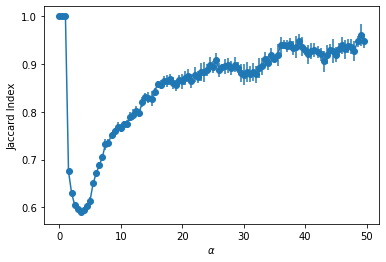

In [10]:
k = np.array(vacc_mean).astype(int)
zs, topk_list =  get_topk_exp_infsize(G, k,p) ## sorted by alpha


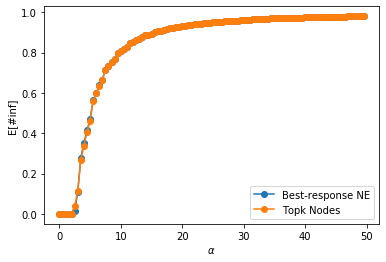

In [13]:
legend = ['Best-response NE', 'Topk Nodes']
plt.plot(alphavals, z4, 'o-')
plt.plot(alphavals, zs, 'o-')
plt.xlabel(r'$\alpha$')
plt.ylabel('E[#inf]')
plt.legend(legend)
plt.savefig('2_3_p4.pdf')

In [21]:
z1 = [0.0, 0.0, 0.0, 8.466693999999999e-05, 0.0006143931400000001, 0.11621650452000001, 0.28730759764, 0.40544547652, 0.48692788334000003, 0.5432037217999999, 0.58304367036, 0.61621397746, 0.6413584274599999, 0.6646489555800001, 0.6820001319, 0.69529812098, 0.7084164478800001, 0.7177516608600001, 0.7272320472, 0.73554320808, 0.74116402448, 0.74884866648, 0.75555067796, 0.7599992265400001, 0.7639070110799999, 0.7704764671200001, 0.7743088228600001, 0.77775685446, 0.7818214595999999, 0.78441262788, 0.7881623923399999, 0.7915095352799999, 0.79444063462, 0.7958034506799999, 0.7987569724799999, 0.8011679343200001, 0.80255887582, 0.8032878506800001, 0.8047655835, 0.8056036925400001, 0.8073806568999998, 0.8096816832599998, 0.8109290723200001, 0.8135127824999999, 0.8157676714400001, 0.81658391726, 0.8187390536400001, 0.82062878206, 0.8220112073400001, 0.8222533455400001, 0.82297753184, 0.8236928776000001, 0.82417124924, 0.8247499491999999, 0.82568094472, 0.8267581192, 0.8270670044199999, 0.8271383257999998, 0.8274926667400001, 0.82856228616, 0.8291240133800001, 0.8296297877199998, 0.83129755318, 0.83213917518, 0.8339173393199999, 0.8352098551600001, 0.83606398226, 0.83774574836, 0.8394103365, 0.8392808321, 0.8409078366200001, 0.8407258742, 0.8419121224800001, 0.8424921135, 0.84384989108, 0.8451182360999999, 0.8461757992200001, 0.8466243552000001, 0.8488649530199999, 0.8497505715199999, 0.8510258075199999, 0.8518995705600002, 0.8524359469799998, 0.8534824628000001, 0.8535906603399999, 0.8543756037, 0.8547002426400001, 0.8549053093600001, 0.8553905743, 0.85558087468, 0.8557723240999999, 0.85613449708, 0.857485252, 0.85766011638, 0.85813415392, 0.85865053132, 0.8591594659399998, 0.8597224596, 0.86012294988, 0.8602017777399998]
z1std = [0.0, 0.0, 0.0, 7.909300097985991e-07, 2.8391476383175254e-05, 0.0036691724915216325, 0.0035404349081443356, 0.005342728072544538, 0.005232266864358971, 0.0041024736363099645, 0.003283798664478067, 0.0033179636491084134, 0.0022891953680222138, 0.0015258649479679579, 0.002424820732992524, 0.0020354085826915324, 0.0010742408486532737, 0.0022109392987322354, 0.0015910732504214903, 0.0019019609099275771, 0.0012941725623416833, 0.001390709945841971, 0.0009621936112992855, 0.0013263432298325226, 0.0011204551994441695, 0.002204067142228162, 0.002018574856981704, 0.0012268031942917123, 0.0011733258153164808, 0.0007228080109548398, 0.0006647403185090076, 0.001488024540648453, 0.0010914782930630355, 0.0016207354311229953, 0.0011271304070572985, 0.0015195244595537902, 0.0010904162139060698, 0.0016842749270714972, 0.0006967880747909825, 0.0010025536795776639, 0.001185606394480973, 0.0014195454197830268, 0.0017329658210487853, 0.001152761560616711, 0.001056667632578996, 0.0011906200994106731, 0.0013509495276875594, 0.0007406890224176922, 0.0009177711591549094, 0.0011911317504912512, 0.0004497312874671143, 0.0006656653354062753, 0.0010781043949328862, 0.0008875772792184203, 0.00104743521844402, 0.0008591929047632686, 0.0005721033023825868, 0.0012015190600657955, 0.0009269228260329432, 0.0007457911108028745, 0.0009113654593039647, 0.0008167251105945756, 0.0014742951132317931, 0.0010122211025943681, 0.0014142042658075067, 0.0010893193655101938, 0.0014231090004818597, 0.0013007727561147571, 0.000917384288944012, 0.0009377258082571984, 0.0013750794378314737, 0.0010242672785031532, 0.0007956652906784892, 0.0009647043559071314, 0.0011526309496347833, 0.0014456193623563407, 0.0005302853796677618, 0.0011002154247111596, 0.0012582458848205693, 0.0009659454198067968, 0.001089656746143375, 0.001746370084824601, 0.001552196185546145, 0.0007789931080195731, 0.0006754781317715054, 0.0008000069336149858, 0.0006011002602625813, 0.0006674234314414167, 0.0007451392093440268, 0.000824251451415872, 0.0007830847590277688, 0.0007468074881167941, 0.0006441856301780317, 0.0009373465219025924, 0.0008932438891119587, 0.0007893820511996641, 0.0010517735160004847, 0.0009916154831578097, 0.0011270493614292062, 0.0007978945145315505]

z3 = [0.0, 0.0, 0.0, 4.2136120000000006e-05, 0.00031438244, 0.0205808568, 0.19083250473999996, 0.34435727132, 0.40936677800000004, 0.5160411722800001, 0.6005966015999998, 0.63488079288, 0.68869621006, 0.7334186961, 0.7506535016999999, 0.7798270061, 0.8062536363399999, 0.8167239647599999, 0.8354879578000001, 0.85036023788, 0.8572165822600001, 0.86895117576, 0.8807373282400001, 0.8856052950600001, 0.8926327212999998, 0.8999874293, 0.9031663803799999, 0.9087480537199998, 0.9142042767400002, 0.9171826891, 0.9219940155599999, 0.9264130910199999, 0.92877754502, 0.93221498306, 0.93633447442, 0.93736061444, 0.9407049410399999, 0.9424822214799999, 0.94414722232, 0.94543693412, 0.9484241961000001, 0.94933211702, 0.9513239902799999, 0.9530568971400001, 0.9541214654400001, 0.9553368242200001, 0.9563460982399998, 0.9573518691599998, 0.9585205794000002, 0.9602660856600002, 0.9603193496200001, 0.9619680679800002, 0.9625030454799999, 0.96342786928, 0.9649391855800002, 0.9658936834400003, 0.96654595128, 0.96753018908, 0.96849927102, 0.96895087828, 0.96967914194, 0.9707180206799999, 0.9712458682000001, 0.9715640045, 0.9723923600600001, 0.9730857523200003, 0.9739033807600002, 0.97446068766, 0.9749142597400002, 0.9758830710200004, 0.9761055809200002, 0.9762958867400002, 0.9766470066400001, 0.9773715619199999, 0.9775758025199999, 0.9779165196799999, 0.97857524838, 0.9787875811200003, 0.9793438458600002, 0.9796947535599999, 0.9799576740600001, 0.9803782774000004, 0.9807271958600001, 0.9808052609999998, 0.9815590082600002, 0.9819942021399999, 0.9819087989599999, 0.9827296909000003, 0.9829594539799995, 0.9831873160999999, 0.98337132888, 0.9839183708000003, 0.9838620505, 0.9845368324599997, 0.98472337562, 0.9849367417399997, 0.9850046711800001, 0.9854663925999999, 0.9856167027200001, 0.9859082076000002]
z3std = [0.0, 0.0, 0.0, 4.137844095661471e-07, 1.783140373336885e-05, 0.0017986180815393127, 0.0023082641613618314, 0.003324572532238918, 0.0029364676495677905, 0.003312075503820974, 0.0030170450180930417, 0.003652522991128433, 0.0031814114050184193, 0.0025645771383317117, 0.002428646607773013, 0.002313180976773082, 0.0024706653569976306, 0.0023216345318151383, 0.00200749131898446, 0.0018800764205442186, 0.0021445797457656413, 0.0012387309281563506, 0.0010609290648237416, 0.0013754982381366367, 0.0013841416051022784, 0.0014737584879439877, 0.0016485232719890635, 0.001268721559183843, 0.0012122412325652069, 0.0013787319656209497, 0.0013346760882243808, 0.000930614859989634, 0.001309247286590994, 0.0008850048656537201, 0.0011655369378471166, 0.0016660268065908114, 0.0014613866723659488, 0.0008040405279648759, 0.0006135359435025746, 0.0011602177455620887, 0.0008916892355369381, 0.001009803821394855, 0.0007587603938720883, 0.0004840494796073254, 0.0009309884492276602, 0.0005417935019302112, 0.0008824210308391973, 0.0008852616665570947, 0.000638049131977694, 0.0008866493758742845, 0.0007269294159308389, 0.0006137843464054738, 0.0004325134204594494, 0.0006344506391377057, 0.00047026276754128323, 0.00060844641766141, 0.0005499403674527329, 0.0007830158805621723, 0.0007128848037000297, 0.0007821215721096167, 0.0005640461558163727, 0.0008827315483130966, 0.0005631676946608873, 0.0004839643334770815, 0.0005825637753449261, 0.0006799635100617442, 0.00036931255813165987, 0.0005534357891687829, 0.0006454649296064936, 0.0005271535747251556, 0.000600091473608052, 0.0006162081500627652, 0.0003565193858715744, 0.0005118245903269025, 0.0004653961577369369, 0.0003062051511660553, 0.0003946693177240807, 0.0005274601972311222, 0.0004866670536528674, 0.000286905595074598, 0.0003241137076175944, 0.0005492266990338527, 0.0003843198545041527, 0.0005293090906228443, 0.0002660669995354145, 0.00031160523992087636, 0.0004457131444066184, 0.0005990124014135795, 0.0004909447788549688, 0.0005233600742920035, 0.00045663295150776104, 0.00033122041801307485, 0.00044140192880151124, 0.00036510838678248647, 0.00033155488350170064, 0.0003745815112197081, 0.0005227615945387466, 0.00044793277307596734, 0.00045544088674929096, 0.0004857994088538498]

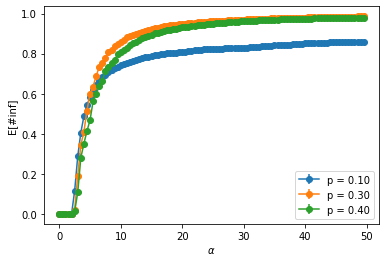

In [23]:
z = [z1, z3, z4]
zstd = [z1std, z3std, z4std]
ps = [0.1, 0.3, 0.4]
legend = ['p = ' + str('%0.2f'%i) for i in ps]
for y, ystd in zip(z,zstd):
    plt.errorbar(alphavals, y, ystd, fmt = 'o-')
plt.xlabel(r'$\alpha$')
plt.ylabel('E[#inf]')
plt.legend(legend)
plt.savefig('powerlaw_cluster_exp_inf.pdf')
plt.show()

In [27]:
v1 = [10000.0, 10000.0, 10000.0, 4899.1, 2842.3, 1723.9, 1179.6, 875.7, 681.4, 552.6, 464.8, 392.5, 342.0, 294.8, 260.7, 234.7, 211.0, 194.0, 176.9, 162.3, 152.8, 140.3, 129.3, 121.4, 116.0, 105.7, 100.1, 94.4, 88.9, 84.9, 79.7, 75.0, 71.7, 69.8, 65.8, 62.8, 61.2, 60.2, 58.4, 57.3, 55.0, 52.3, 51.2, 48.0, 45.8, 44.9, 42.0, 40.1, 39.3, 38.7, 37.8, 37.0, 36.4, 36.0, 35.3, 34.1, 33.7, 33.6, 33.1, 32.6, 31.8, 31.3, 29.9, 29.2, 27.7, 26.6, 25.4, 24.1, 22.9, 22.8, 21.5, 21.7, 20.7, 20.2, 19.0, 18.3, 17.4, 16.8, 15.2, 14.3, 13.4, 12.7, 12.2, 11.5, 11.3, 10.8, 10.6, 10.7, 9.9, 9.7, 9.7, 9.4, 8.3, 8.4, 8.1, 7.6, 7.3, 7.0, 6.7, 6.5]
v1std = [0.0, 0.0, 0.0, 9.689685237405806, 14.415616532080756, 14.590750494748377, 9.840731680114036, 12.256018929489297, 11.377170122662314, 10.781465577554842, 7.386474125047755, 6.88839603971781, 4.8166378315169185, 2.227105745132009, 4.337049688440287, 3.3181320046074116, 1.61245154965971, 4.58257569495584, 2.3, 3.579106033634656, 1.661324772583615, 2.0999999999999996, 1.7916472867168918, 1.624807680927192, 2.4083189157584592, 2.968164415931166, 2.844292530665578, 1.6852299546352716, 1.8681541692269403, 1.0440306508910548, 1.6155494421403513, 1.7888543819998317, 1.268857754044952, 1.9390719429665315, 1.16619037896906, 1.661324772583615, 1.16619037896906, 1.8330302779823358, 1.2, 0.7810249675906653, 1.3416407864998738, 1.1, 1.7204650534085253, 1.1832159566199232, 1.0770329614269007, 1.2206555615733703, 1.3416407864998738, 0.5385164807134504, 0.6403124237432849, 0.9, 0.4, 0.0, 0.66332495807108, 0.6324555320336759, 0.9, 0.5385164807134504, 0.45825756949558394, 0.4898979485566356, 0.8306623862918076, 0.4898979485566356, 0.6, 0.9000000000000001, 1.044030650891055, 0.8717797887081348, 1.0999999999999999, 0.9165151389911679, 1.0198039027185568, 0.9433981132056604, 0.7, 0.7483314773547883, 0.9219544457292888, 0.6403124237432849, 0.6403124237432849, 0.6, 0.7745966692414834, 1.004987562112089, 0.4898979485566356, 0.7483314773547882, 0.8717797887081347, 0.9, 0.8, 1.004987562112089, 0.9797958971132711, 0.5, 0.45825756949558394, 0.4, 0.4898979485566356, 0.45825756949558394, 0.5385164807134504, 0.45825756949558394, 0.45825756949558394, 0.4898979485566356, 0.45825756949558394, 0.6633249580710799, 0.5385164807134504, 0.4898979485566356, 0.6403124237432849, 0.6324555320336759, 0.6403124237432849, 0.5]

v3 = [10000.0, 10000.0, 10000.0, 6985.5, 5490.5, 4914.9, 3956.9, 3192.7, 2864.1, 2327.0, 1906.9, 1737.2, 1475.3, 1260.7, 1178.6, 1038.8, 912.7, 863.1, 773.9, 702.8, 670.2, 615.0, 559.1, 535.8, 502.4, 468.0, 453.1, 426.7, 400.6, 386.6, 364.1, 343.1, 332.1, 315.9, 296.5, 291.6, 275.7, 267.4, 259.5, 253.6, 239.4, 235.2, 225.7, 217.5, 212.6, 206.8, 201.8, 197.3, 191.7, 183.5, 183.3, 175.7, 173.0, 168.7, 161.7, 157.1, 154.2, 149.5, 144.9, 142.8, 139.2, 134.6, 132.1, 130.4, 126.4, 123.3, 119.8, 117.0, 114.8, 110.5, 109.3, 108.3, 106.7, 103.3, 102.3, 100.7, 97.6, 96.5, 94.1, 92.5, 90.8, 89.1, 87.4, 87.0, 83.6, 81.6, 82.1, 78.0, 77.1, 76.0, 75.2, 72.6, 72.9, 69.8, 68.8, 68.0, 67.3, 65.4, 64.4, 63.3]
v3std = [0.0, 0.0, 0.0, 17.118703221914913, 12.917043005270207, 16.573774464496616, 17.35770722186545, 16.27912774076056, 15.87734234687909, 16.601204775557708, 15.80790941269591, 17.180221186003397, 15.805378831271335, 12.1, 11.119352499134111, 10.428806259586953, 11.576268828944842, 10.64377752492037, 9.637945839233586, 8.840814442120138, 10.215674231297706, 5.458937625582473, 4.928488612140643, 6.690291473471093, 6.636264009214822, 6.870225614927067, 7.905061669588669, 6.017474553332153, 6.053098380168622, 6.2801273872430325, 6.3, 4.5265881191025095, 5.940538696111658, 3.8845849199110063, 5.408326913195984, 7.722693830523128, 6.797793759742936, 3.9293765408777004, 2.9068883707497264, 5.407402333838311, 4.2708313008125245, 4.3999999999999995, 3.465544690232691, 2.3345235059857505, 4.498888751680798, 2.5612496949731396, 4.354308211415448, 4.172529209005012, 2.9342801502242417, 4.05585995813465, 3.4942810419312296, 2.9342801502242417, 1.9493588689617927, 2.9342801502242417, 2.0999999999999996, 2.773084924772409, 2.4413111231467406, 3.6674241641784495, 3.207802986469088, 3.709447398198281, 2.481934729198171, 4.223742416388575, 2.662705391138869, 2.416609194718914, 2.8354893757515653, 3.3181320046074116, 1.7776388834631178, 2.8284271247461903, 3.059411708155671, 2.29128784747792, 2.7946377224964243, 3.0016662039607267, 1.5524174696260025, 2.41039415863879, 2.1, 1.2688577540449522, 1.624807680927192, 2.29128784747792, 2.3853720883753127, 1.3601470508735443, 1.6, 2.5079872407968904, 1.9078784028338913, 2.3664319132398464, 1.3564659966250536, 1.42828568570857, 2.118962010041709, 2.756809750418044, 2.1656407827707715, 2.4083189157584592, 2.1354156504062622, 1.4966629547095764, 1.9209372712298545, 1.7776388834631178, 1.5362291495737217, 1.7320508075688772, 2.4515301344262523, 2.1071307505705477, 2.009975124224178, 2.238302928559939]



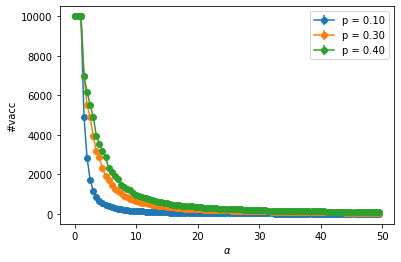

In [28]:
v = [v1, v3, v4]
vstd = [v1std, v3std, v4std]
legend = ['p = ' + str('%0.2f'%i) for i in ps]
for y, ystd in zip(v,vstd):
    plt.errorbar(alphavals, y, ystd, fmt = 'o-')
plt.xlabel(r'$\alpha$')
plt.ylabel('#vacc')
plt.legend(legend)
plt.savefig('powerlaw_cluster_vacc.pdf')


In [ ]:
max([G.degree(v) for v in G.nodes()])

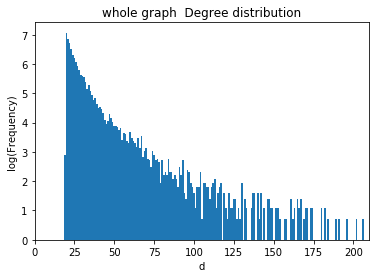

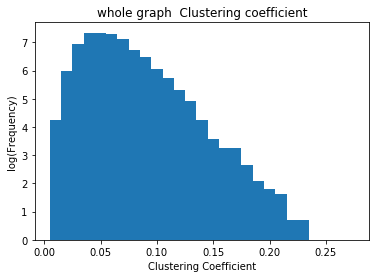

In [16]:
compare_degree(G, 'whole graph ')
compare_cc(G, 'whole graph ')

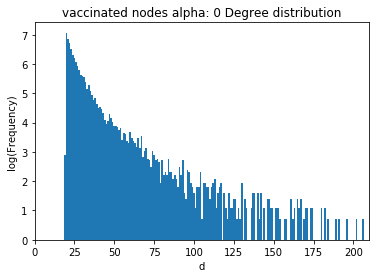

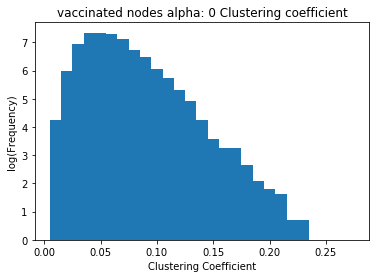

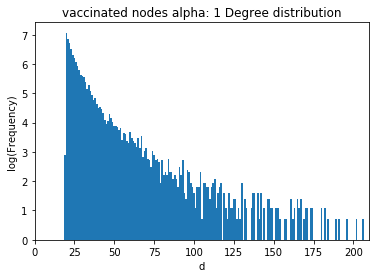

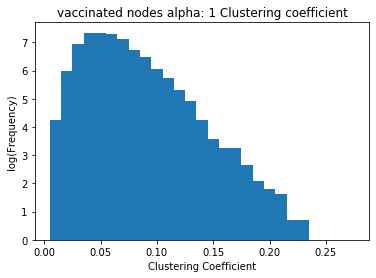

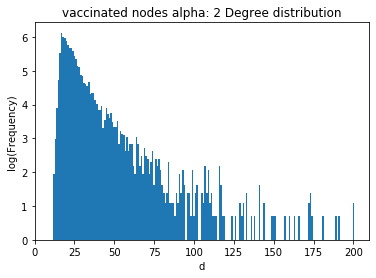

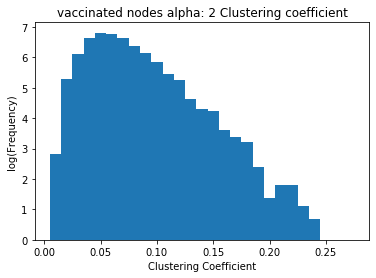

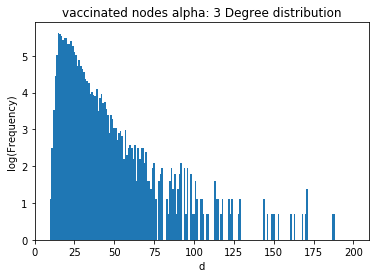

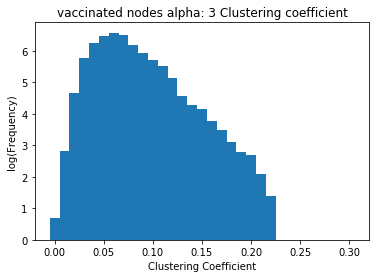

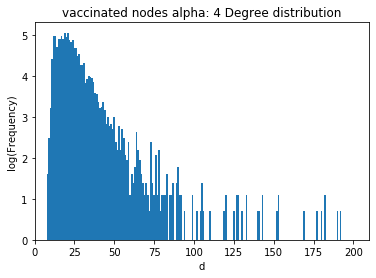

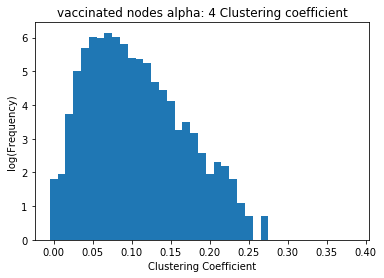

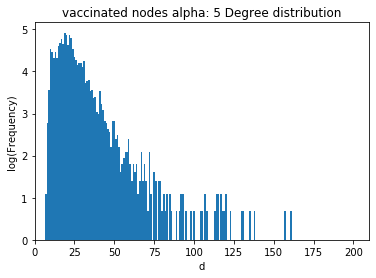

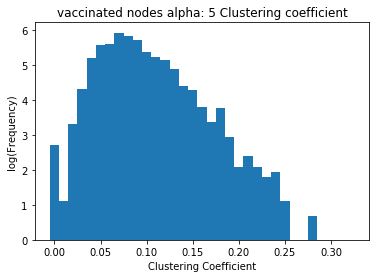

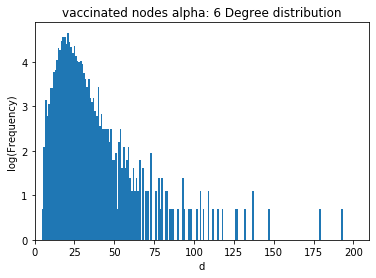

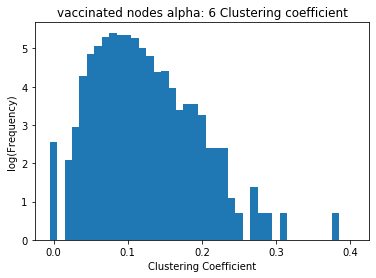

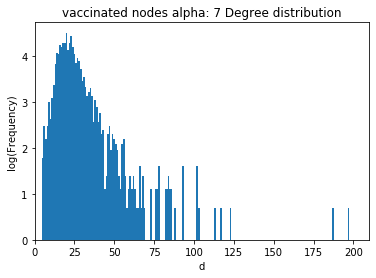

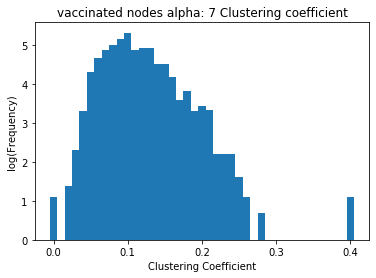

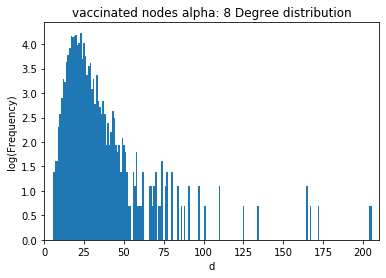

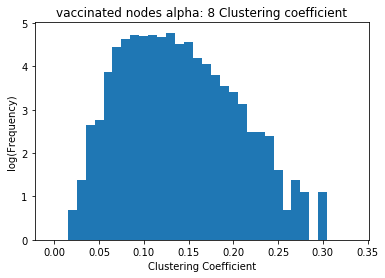

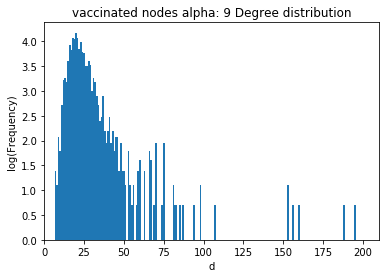

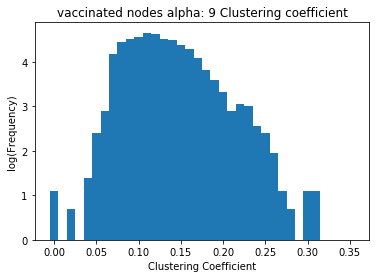

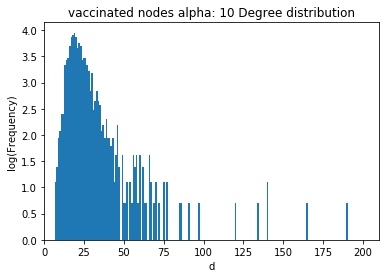

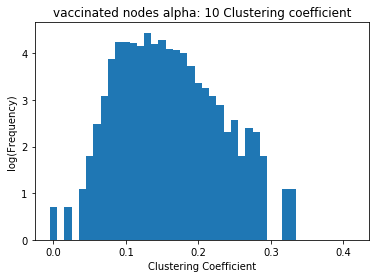

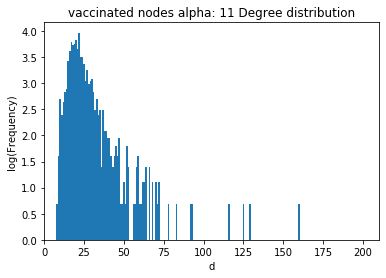

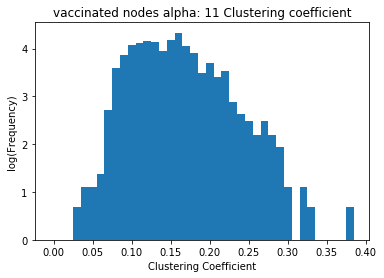

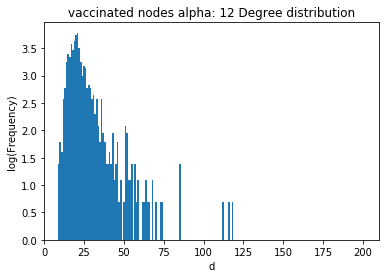

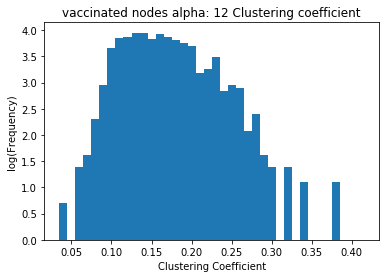

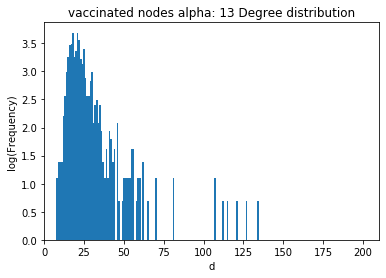

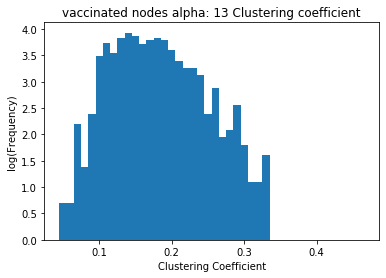

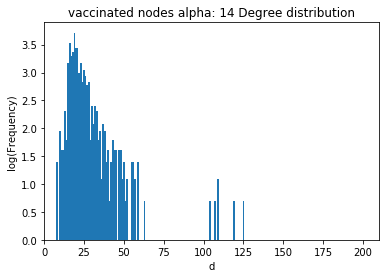

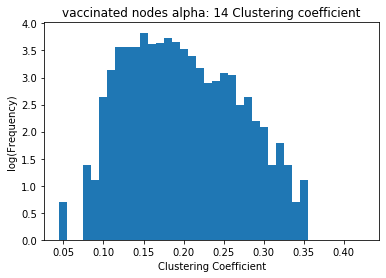

In [17]:
for alpha in range(15):
    v = set(get_provax(xlist_alpha[alpha][0]))
    s = G.subgraph(v)

    compare_degree(s, 'vaccinated nodes alpha: ' + str(alpha))
    compare_cc(s, 'vaccinated nodes alpha: ' + str(alpha))